In [4]:
import tensorflow as tf
import numpy as np

In [5]:
imdb = tf.keras.datasets.imdb

In [6]:
idx = imdb.get_word_index()

In [7]:
train, test = imdb.load_data()

In [8]:
train_y = train[1]
train = train[0]
test_y = test[1]
test = test[0]

In [9]:
train.shape

(25000,)

In [10]:
test.shape

(25000,)

In [11]:
print(np.unique(train_y, return_counts=True))
print(np.unique(test_y, return_counts=True))

(array([0, 1], dtype=int64), array([12500, 12500], dtype=int64))
(array([0, 1], dtype=int64), array([12500, 12500], dtype=int64))


In [12]:
integer_to_word = dict([(value, key) for (key, value) in idx.items()])

# demonstrate how to find the word from an integer
print(integer_to_word[1])
print(integer_to_word[14])

# we need to subtract 3 from the indices because 0 is 'padding', 1 is 'start of sequence' and 2 is 'unknown'
decoded_review = ' '.join([integer_to_word.get(i - 3, 'UNK') for i in train[1]])
print(decoded_review)

the
as
UNK big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal measures the hair is big lots of boobs bounce men wear those cut tee shirts that show off their stomachs sickening that men actually wore them and the music is just synthesiser trash that plays over and over again in almost every scene there is trashy music boobs and paramedics taking away bodies and the gym still doesn't close for bereavement all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then

In [13]:
' '.join([integer_to_word.get(i - 3, 'UNK') for i in train[np.where(train_y == 1)][0]])


"UNK this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should

In [14]:
pos = train[np.where(train_y == 1)]
neg = train[np.where(train_y != 1)]

Average length of positive reviews

In [24]:
sum([len(i) for i in pos])/len(pos)

241.56296

Average length of negative reviews

In [25]:
sum([len(i) for i in neg])/len(neg)

235.86432

In [26]:
pos_f = [len(i) for i in pos]
neg_f = [len(i) for i in neg]

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", palette="muted", color_codes=True)

[Text(0, 0.5, 'freq'), Text(0.5, 0, 'words per review')]

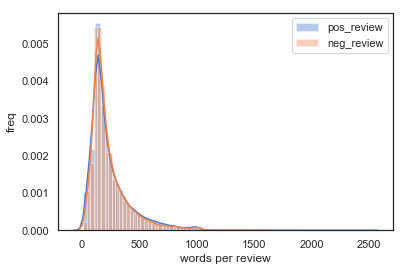

In [33]:
fig, ax = plt.subplots()
sns.distplot(pos_f, label='pos_review')
sns.distplot(neg_f, label='neg_review')
ax.legend()
ax.set(xlabel='words per review', ylabel='freq')